<a href="https://colab.research.google.com/github/nirmal20092003/CODSOFT/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

Load dataset

In [8]:
df = pd.read_csv('/content/sample_data/creditcard.csv')
df.dropna(subset=['Class'], inplace=True)

Normalize 'Amount' and 'Time'

In [9]:
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['normTime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

Define features and target

In [10]:
X = df.drop('Class', axis=1)
y = df['Class']

 Handle class imbalance using SMOTE

In [11]:
sm = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = sm.fit_resample(X, y)

Train-test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Train model

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predict

In [14]:
y_pred = model.predict(X_test)

Evaluate

In [15]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

Output results


In [16]:
print(f"\n✅ Model Evaluation Metrics:")
print(f"Accuracy: {acc*100:.2f}%")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Evaluation Metrics:
Accuracy: 99.99%
Precision: 0.9998
Recall: 1.0000
F1 Score: 0.9999
ROC AUC Score: 0.9999

📊 Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6560
         1.0       1.00      1.00      1.00      6515

    accuracy                           1.00     13075
   macro avg       1.00      1.00      1.00     13075
weighted avg       1.00      1.00      1.00     13075



 Confusion matrix

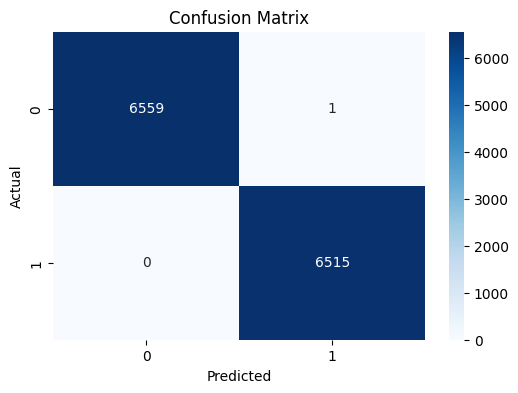

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()